# Визуализация данных

**Цель**: познакомиться со статической визуализацией данных на Python на примере нескольких популярных библиотек

**Идея**: визуализация помогает гораздо быстрее понять смысл, лежащий за данными, найти первые ответы на вопросы, сформулировать последующие вопросы.

Важное:

1) Данные редко бывают в форме готовой для визуализации. Обычно их надо как-то подготовить: привести к удобным типам, агрегировать, придать удобную форму; привести к такому формату, который необходим для визуализации с учётом специфики используемой библиотеки визуализации.

2) Графики нужны не сами по себе, но для ответа на определённые вопросы, поэтому перед построением графика следует определиться с его типом. Какие графики и каких типов бывают можно посмотреть [здесь](https://datavizcatalogue.com/index.html).

Знакомство с библиотеками:
- [matplotlib](https://matplotlib.org/stable/tutorials/index.html)
- [seaborn](https://seaborn.pydata.org/tutorial.html)

Знакомство с типами графиков:
- Линейный график,
- Диаграмма рассеяния (scatterplot)
- Гистограмма,

## Общие сведения о Matplotlib

**Matplotlib** — это библиотека визуализации данных, построенная на массивах **NumPy** и предназначенная для работы с более широким стеком **SciPy**. Он был задуман Джоном Хантером в 2002 году первоначально как патч для IPython, позволяющий интерактивное построение графиков в стиле MATLAB с помощью gnuplot из командной строки IPython.

In [4]:
# импорт библиотеки matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Как мы увидим в этой далее, plt используется чаще всего

In [2]:
# стили
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Подробнее про стили [здесь](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [28]:
plt.style.use('seaborn-v0_8-whitegrid')

Отображение визуализаций в блокноте можно выполнить с помощью команды %matplotlib двумя возможными вариантами:
*   `%matplotlib notebook` приведет к интерактивным графикам, встроенным в блокнот.
*   `%matplotlib inline` приведет к статическим изображениям вашего графика, встроенным в блокнот.



In [3]:
# воспользуемся %matplotlib inline
%matplotlib inline

После запуска этой команды (ее необходимо выполнить только один раз для каждого ядра/сеанса) любая ячейка в блокноте, создающая график, будет вставлять изображение этого графика:

In [2]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');


NameError: name 'plt' is not defined

Одной из приятных особенностей Matplotlib является возможность сохранять рисунки в самых разных форматах. Сохранение фигуры можно выполнить с помощью `savefig()`. Например, чтобы сохранить предыдущий рисунок в формате PNG, нужно запустить следующий код

In [30]:
fig.savefig('my_figure.png')

Чтобы убедиться, что файл содержит то, что мы думаем, воспользуемся объектом IPython Image для отображения содержимого этого файла:

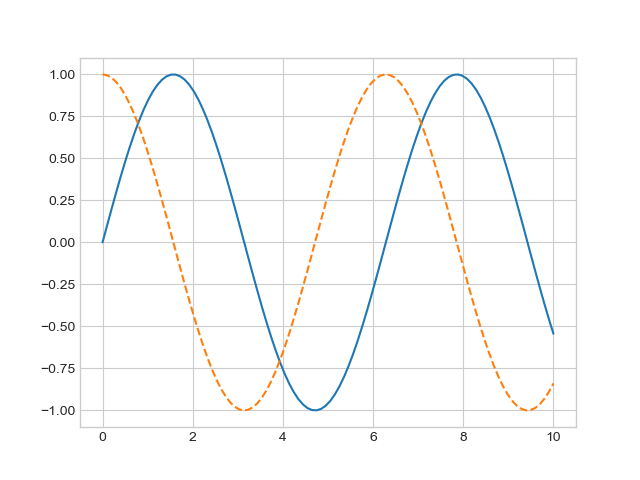

In [31]:
from IPython.display import Image
Image('my_figure.png')

В `savefig()` формат файла определяется по расширению заданного имени файла. Список поддерживаемых типов файлов для вашей системы можно найти с помощью следующего метода объекта холста фигуры:

In [32]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

Особенностью Matplotlib являются его двойной интерфейс: 

1) **"функциональный"**: вызываются функции уровня модуля matplotlib.pyplot

2) **"объектный"**: вызываются функции уровня объектов (предпочительный для построения изысканных графиков: код получается чище, понятнее, больше возможностей).

**Функциональный интерфейс**

Matplotlib изначально был написан как альтернатива Python для пользователей MATLAB, и большая часть его синтаксиса отражает этот факт. Инструменты в стиле MATLAB содержатся в интерфейсе **pyplot (plt)**.

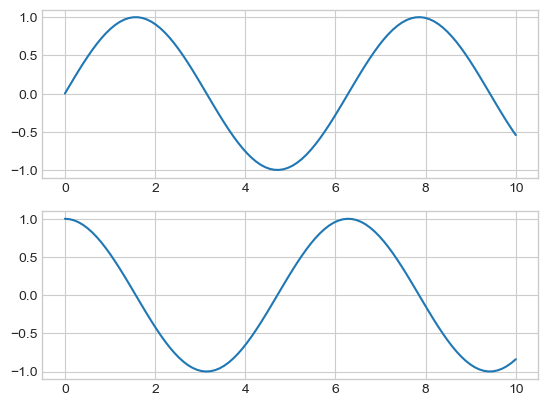

In [33]:
# пример "функционального" использования
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Важно отметить, что этот интерфейс имеет состояние: он отслеживает «текущую» фигуру и оси, к которым применяются все команды **plt**. Вы можете получить ссылку на них, используя `plt.gcf()` (получить текущую фигуру) и `plt.gca()` (получить текущие оси).

Хотя этот интерфейс с отслеживанием состояния быстр и удобен для простых графиков, с ним легко столкнуться с проблемами. Например, как только будет создана вторая панель, как мы сможем вернуться и добавить что-нибудь к первой? Это возможно в функциональном интерфейсе, но немного неудобно. К счастью, есть способ лучше.

**Объектный interface**

Объектно-ориентированный интерфейс доступен для таких более сложных ситуаций, а также для случаев, когда вам нужно больше контроля над своей фигурой. Вместо того, чтобы зависеть от некоторого понятия «активной» фигуры или осей, в объектно-ориентированном интерфейсе функции построения графиков являются методами явных объектов **Figure** и **Axes**.

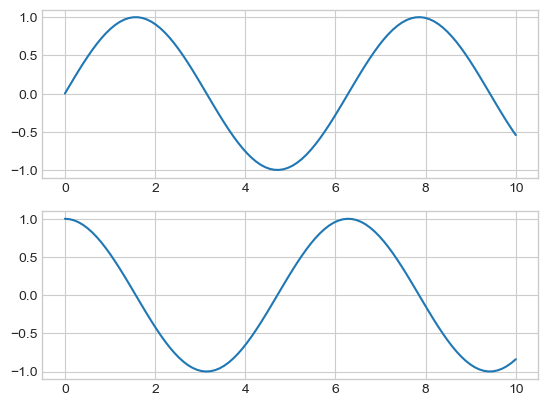

In [34]:
# пример "объектного" использования
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Для более простых графиков выбор используемого стиля во многом зависит от предпочтений, но **объектно-ориентированный подход** может стать необходимостью по мере усложнения задач. На протяжении всего блокнота мы будем переключаться между интерфейсами в зависимости от того, что наиболее удобно. В большинстве случаев разница сводится к переключению `plt.plot()` на `ax.plot()`.

## Линейный график (Line Plot)

Cамый простой из всех графиков — это визуализация одной функции `y=f(x)`.

Для всех графиков Matplotlib мы начинаем с создания figure и axes. В простейшей форме figure и axes можно создать следующим образом:

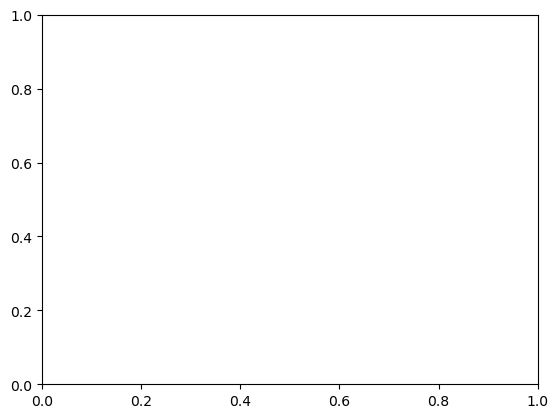

In [18]:
fig = plt.figure()
ax = plt.axes()

Пользовательская работа подразумевает операции с разными уровнями: **Figure(Рисунок)** -> **Axes(Область рисования)** ->
**Axis(Координатная ось)**

1. **Рисунок (Figure)**

Любой рисунок в matplotlib имеет вложенную структуру. Рисунок - это объект самого верхнего уровня, на котором располагаются:
*   области рисования (**Axes**);
*   элементы рисунка **Artists** (заголовки, легенда и т.д.);
*   основа-холст (**Canvas**).

На рисунке может быть несколько областей рисования **Axes**, но данная область рисования **Axes** может принадлежать только одному рисунку **Figure**.
2. **Область рисования (Axes)**

Объект среднего уровня. Это часть изображения с пространством данных. Каждая область рисования **Axes** содержит две (или три в случае
трёхмерных данных) координатных оси (**Axis** объектов), которые упорядочивают отображение данных.

3. **Координатная ось (Axis)**

Координатная ось является объектом среднего уровня, которая определяет область изменения данных. На них наносятся:
*   деления **ticks**;
*   подписи к делениям **ticklabels**.

Расположение делений определяется объектом **Locator**, а подписи делений обрабатывает объект **Formatter**. Конфигурация координатных
осей заключается в комбинировании различных свойств объектов **Locator** и **Formatter**.
4. **Элементы рисунка (Artists)**

Практически всё, что отображается на рисунке является элементом рисунка (**Artist**), даже объекты Figure, Axes и Axis. Элементы рисунка
**Artists** включают в себя такие простые объекты как:

*   текст (**Text**);
*   плоская линия (**Line2D**);
*   фигура (**Patch**) и другие.

Когда происходит отображение рисунка (figure rendering), все элементы рисунка **Artists** наносятся на основу-холст (**Canvas**). Большая часть
из них связывается с областью рисования **Axes**. Также элемент рисунка не может совместно использоваться несколькими областями **Axes**
или быть перемещён с одной на другую.

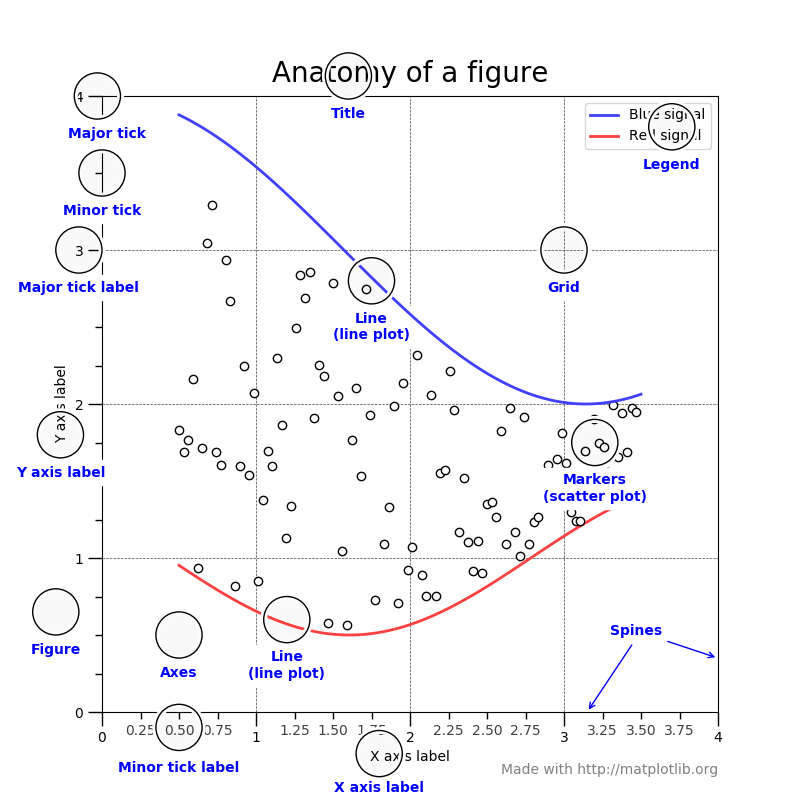

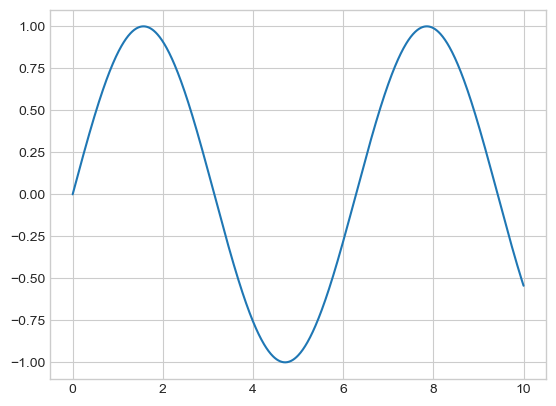

In [36]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Мы можем создавать figure и axes в фоновом режиме:


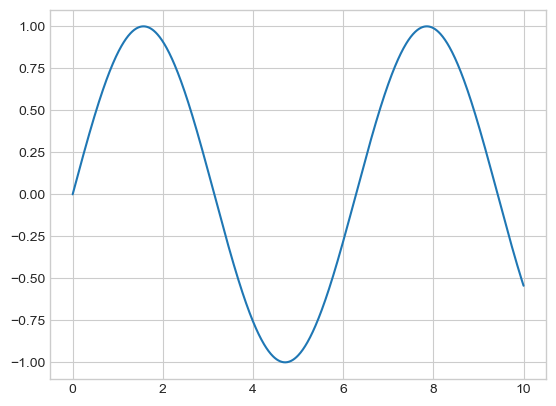

In [37]:
plt.plot(x, np.sin(x));

Если мы хотим создать одну figure с несколькими линиями, мы можем просто вызвать функцию построения графика несколько раз:

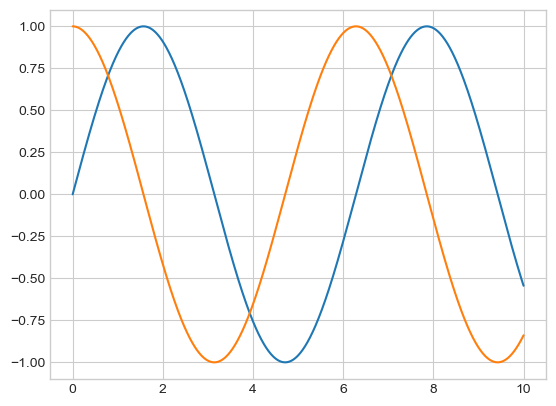

In [38]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Первая настройка, которую вы, возможно, захотите задать в графике, — это управление цветами и стилями линий. Функция `plt.plot()` принимает дополнительные аргументы, которые можно использовать для их указания. Чтобы настроить цвет, вы можете использовать **color**, которое принимает строковый аргумент, представляющий практически любой мыслимый цвет. Цвет можно задать разными способами:

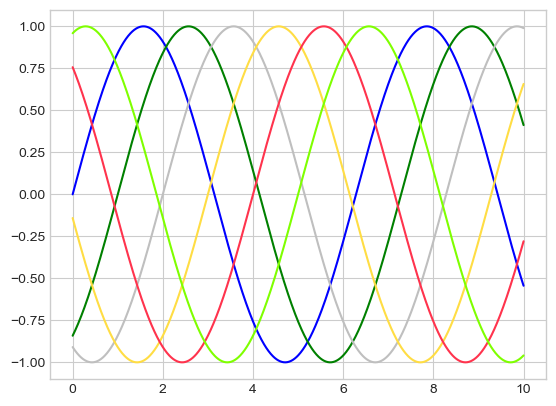

In [39]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Аналогично, стиль линии можно настроить с помощью **linestyle**:

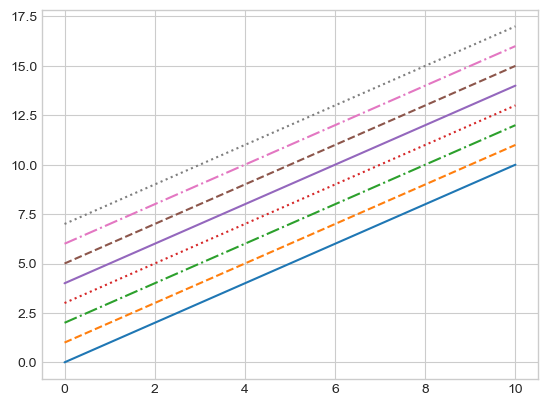

In [40]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Если вы хотите быть предельно кратким, эти коды стиля линий и цвета можно объединить в один аргумент, не являющийся ключевым словом, для функции `plt.plot()`:

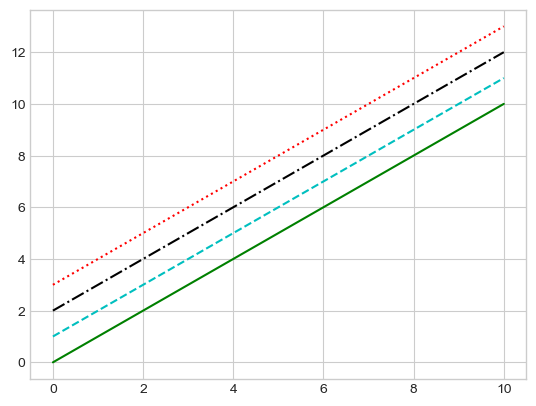

In [41]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Эти односимвольные цветовые коды отражают стандартные сокращения в цветовых системах **RGB** (красный/зеленый/синий) и **CMYK** (голубой/пурпурный/желтый/черный), обычно используемых для цифровой цветной графики.

Существует множество других ключевых аргументов, которые можно использовать для точной настройки внешнего вида графика. Для получения более подробной информации [ссылка](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

**Matplotlib** неплохо справляется с выбором пределов осей по умолчанию для вашего графика, но иногда необходимо настроить оси точнее. Самый простой способ настроить пределы оси — использовать методы `plt.xlim()` и `plt.ylim()`:

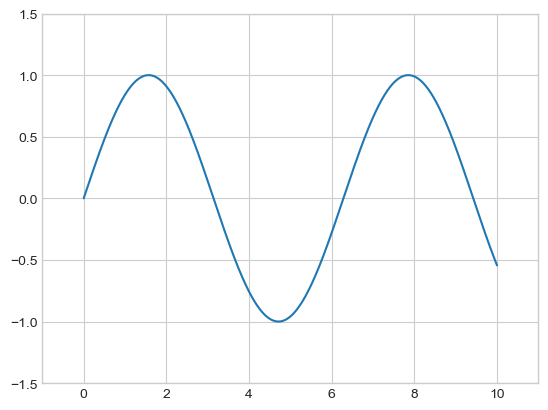

In [42]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Если по какой-то причине вы хотите, чтобы какая-либо ось отображалась в обратном порядке, вы можете просто изменить порядок аргументов:

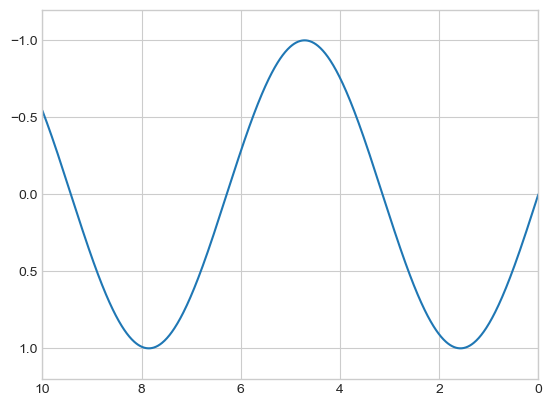

In [43]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

Полезным родственным методом является `plt.axis()` (обратите внимание на потенциальную путаницу между осями с буквой e и осями с буквой i). Метод `plt.axis()` позволяет вам установить пределы x и y одним вызовом, передав список, в котором указаны [xmin, xmax, ymin, ymax]:

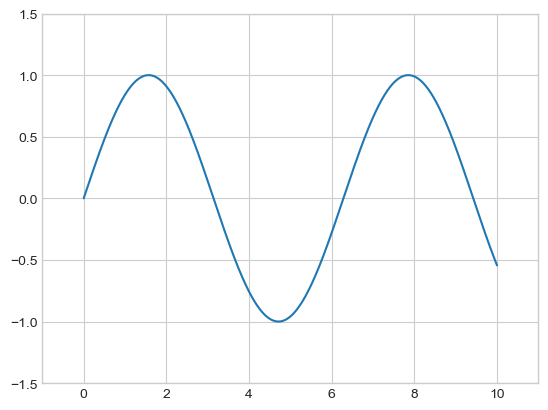

In [44]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Метод `plt.axis()` автоматически сужать границы текущего графика:

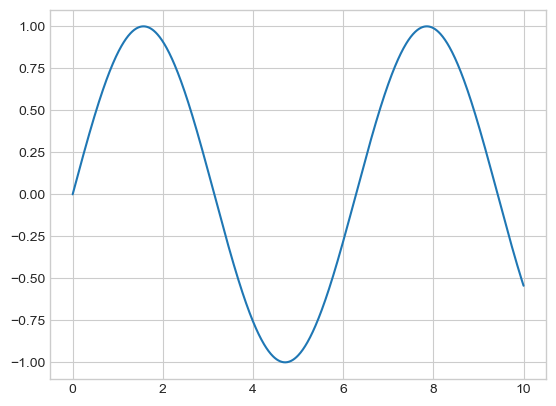

In [45]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Он позволяет использовать спецификации даже более высокого уровня, например, обеспечивать одинаковое соотношение сторон, чтобы на вашем экране одна единица по x была равна одной единице по y:

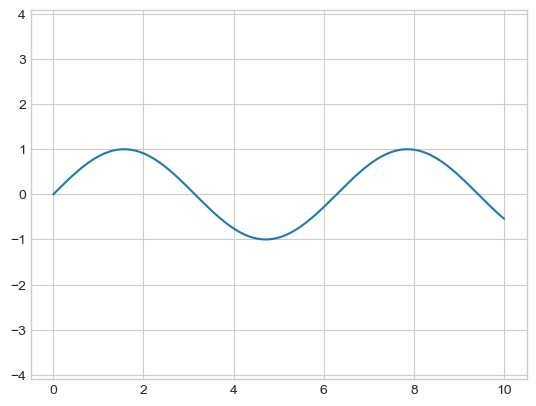

In [46]:
plt.plot(x, np.sin(x))
plt.axis('equal');

Для получения дополнительной информации об ограничениях оси и других возможностях метода `plt.axis` [ссылка](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html)

В Matplotlib предусмотрены методы, задающие маркировку графиков: заголовки, метки осей и простые легенды.

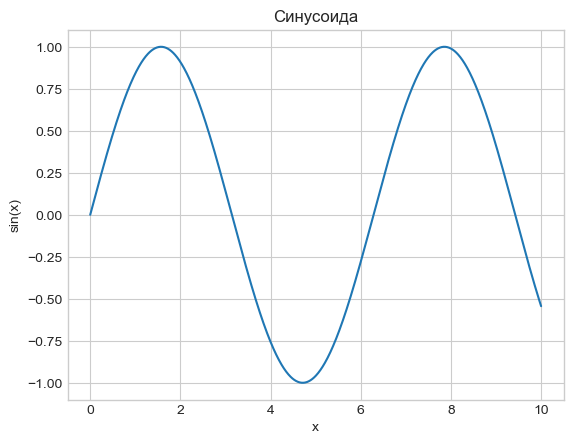

In [47]:
plt.plot(x, np.sin(x))
plt.title("Синусоида")
plt.xlabel("x")
plt.ylabel("sin(x)");

Положение, размер и стиль этих меток можно настроить с помощью необязательных аргументов функции.

Когда в пределах одной оси отображается несколько линий, полезно создать легенду графика, которая помечает каждый тип линии. Matplotlib имеет встроенный способ быстрого создания такой легенды. Это делается с помощью метода `plt.legend()`. Для указания метки каждой линии проще всего использовать **label** функции графика.

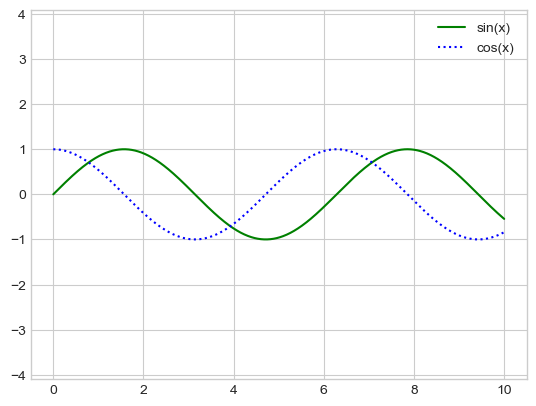

In [48]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

Функция `plt.legend()` отслеживает стиль и цвет линии и сопоставляет их с правильной меткой. Дополнительную информацию об указании и форматировании легенд графиков можно найти по [ссылке](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

Хотя большинство функций `plt` преобразуются непосредственно в методы `ax` (например, `plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend`() и т. д.), это относится не ко всем командам. В частности, немного изменены функции установки лимитов, меток и заголовков:
*   `plt.xlabel()` → `ax.set_xlabel()`
*   `plt.ylabel()` → `ax.set_ylabel()`
*   `plt.xlim()` → `ax.set_xlim()`
*   `plt.ylim()` → `ax.set_ylim()`
*   `plt.title()` → `ax.set_title()`











## Задание 1
Построить синусоиду в соответствии с рисунком ниже с помощью метода `ax.set()` объектно-ориентированного интерфейса

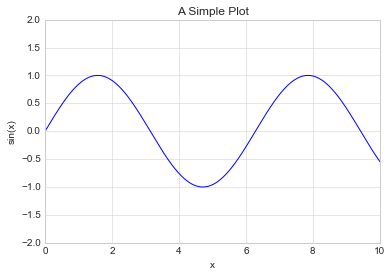

Подсказка: `ax.set()`используется для установки многих свойств графика одновременно

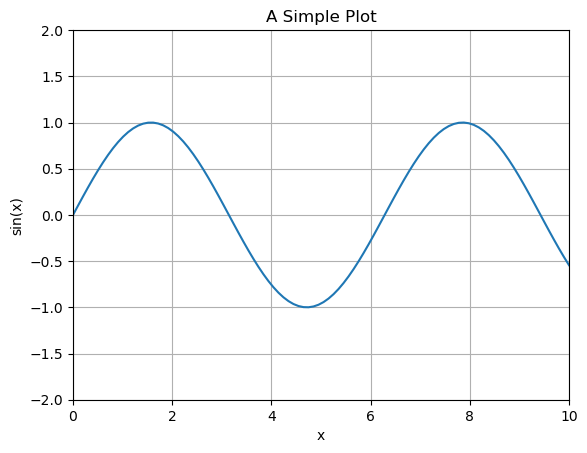

In [37]:
x = np.linspace(0, 10, 100)


fig = plt.figure()
ax = plt.axes()
plt.plot(x, np.sin(x))
ax.set(ylabel ='sin(x)', xlabel ='x', xlim =(0, 10), ylim =(-2, 2), title='A Simple Plot')
ax.grid()

plt.show()

## Диаграмма рассеяния (Scatter Plot)

Другим часто используемым типом графика является простая диаграмма рассеяния, близкая родственница линейного графика. Вместо того, чтобы точки соединялись отрезками линий, здесь точки представлены индивидуально с помощью точки, круга или другой формы.

В предыдущем разделе мы рассмотрели `plt.plot`/`ax.plot` для создания линейных графиков. Оказывается, эта же функция может создавать диаграммы рассеяния:

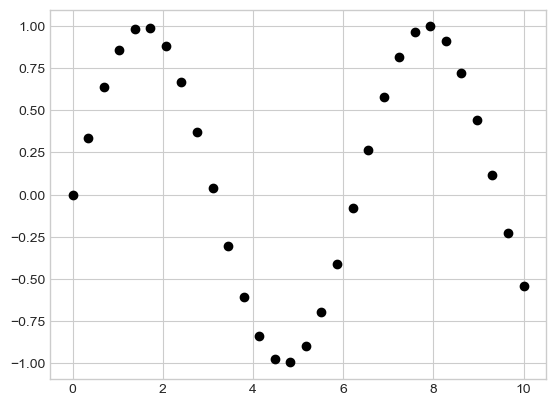

In [49]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Третий аргумент в вызове функции — это символ, представляющий тип символа, используемого для построения графика. Точно так же, как вы можете указать такие параметры, как «-», «--», для управления стилем линии, стиль маркера имеет свой собственный набор коротких строковых кодов.

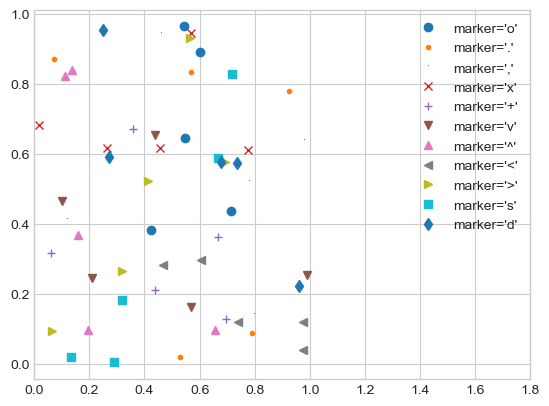

In [50]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Чтобы получить еще больше возможностей, эти коды символов можно использовать вместе с кодами линий и цветов для построения точек вместе с линией, соединяющей их:

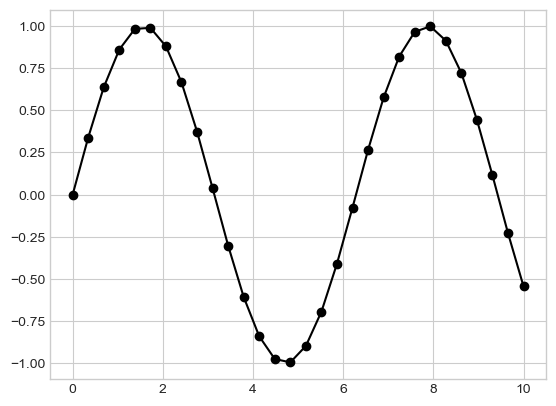

In [51]:
plt.plot(x, y, '-ok');

Дополнительные аргументы ключевого слова `plt.plot` задают широкий спектр свойств линий и маркеров:

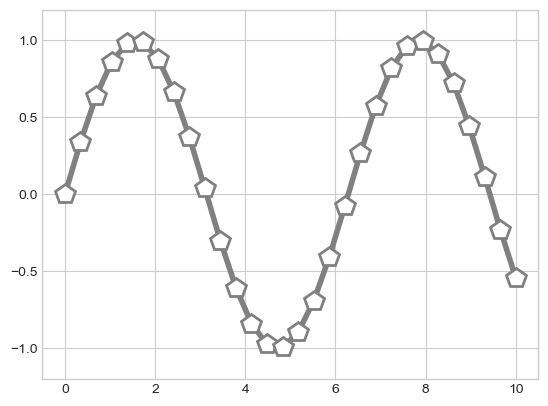

In [52]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

Второй, более мощный метод создания диаграмм рассеяния — это функция `plt.scatter`, которую можно использовать очень похоже на функцию `plt.plot`:

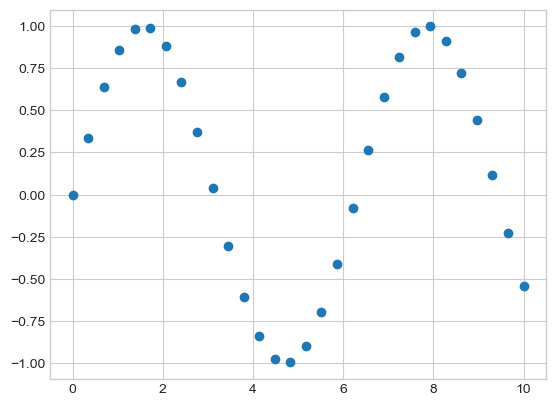

In [53]:
plt.scatter(x, y, marker='o');

Основное отличие `plt.scatter` от `plt.plot` заключается в том, что его можно использовать для создания диаграмм рассеяния, где свойства каждой отдельной точки (размер, цвет грани, цвет края и т. д.) можно индивидуально контролировать или сопоставлять с данными.

Создадим диаграмму случайного рассеяния с точками разных цветов и размеров. Чтобы лучше видеть перекрывающиеся результаты, мы также будем использовать **alpha** для настройки уровня прозрачности:

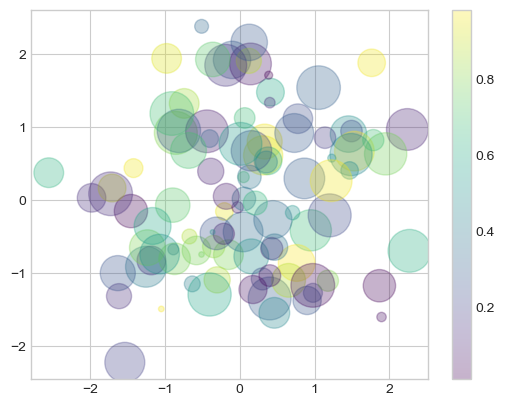

In [54]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Обратите внимание, что аргумент цвета автоматически сопоставляется с цветовой шкалой (показанной здесь командой `colorbar()`), а аргумент размера задается в пикселях. Таким образом, цвет и размер точек можно использовать для передачи информации при визуализации, чтобы визуализировать многомерные данные.

Например, мы могли бы использовать данные Iris из Scikit-Learn, где каждый образец представляет собой один из трех типов цветов, у которых был тщательно измерен размер лепестков и чашелистиков:

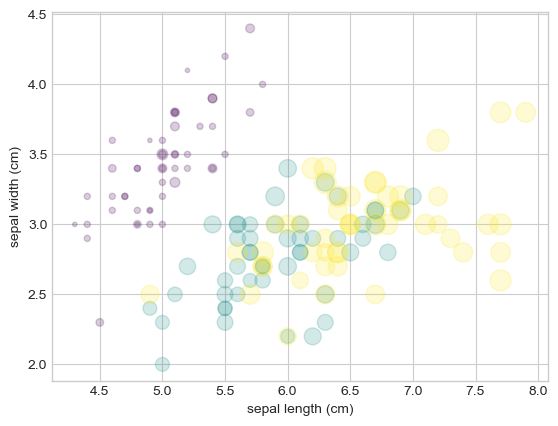

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Мы видим, что эта диаграмма рассеяния дала нам возможность одновременно исследовать четыре различных измерения данных: местоположение (x, y) каждой точки соответствует длине и ширине чашелистика, размер точки связан с шириной лепестка и цвет зависят от конкретного вида цветка. Подобные многоцветные и многокомпонентные диаграммы рассеяния могут быть полезны как для исследования, так и для представления данных.

На больших данных `plt.plot` может быть заметно более эффективным, чем `plt.scatter`. Причина в том, что `plt.scatter` имеет возможность отображать разные размеры и/или цвета для каждой точки, поэтому средству визуализации приходится выполнять дополнительную работу по построению каждой точки индивидуально. В `plt.plot`, напротив, точки всегда по сути являются клонами друг друга, поэтому работа по определению внешнего вида точек выполняется только один раз для всего набора данных. Для больших наборов данных разница между этими двумя может привести к совершенно разной производительности, и по этой причине для больших наборов данных следует отдавать предпочтение `plt.plot`, а не `plt.scatter`.

## Гистограмма

Простая гистограмма может стать отличным первым шагом в понимании набора данных.

In [56]:
data = np.random.randn(1000)

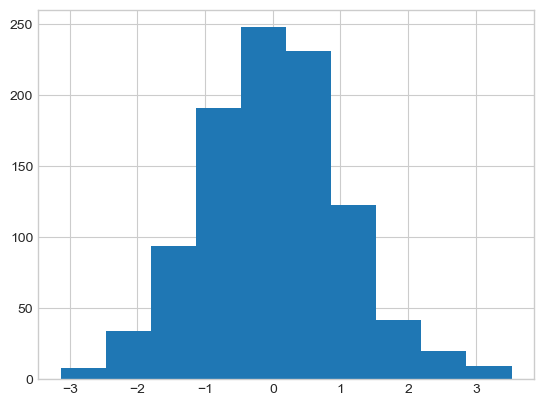

In [57]:
plt.hist(data);

Функция `hist()` имеет множество опций для настройки как вычислений, так и отображения

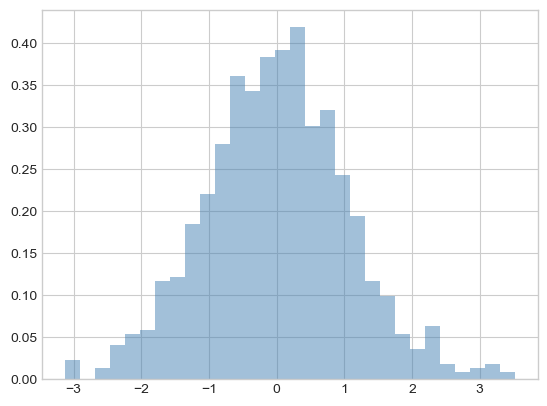

In [58]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled',density =True, color='steelblue',
         edgecolor='none');

**histtype='stepfilled'** вместе с некоторой **alpha** (задающей прозрачность) могут быть полезны при сравнении гистограмм нескольких распределений

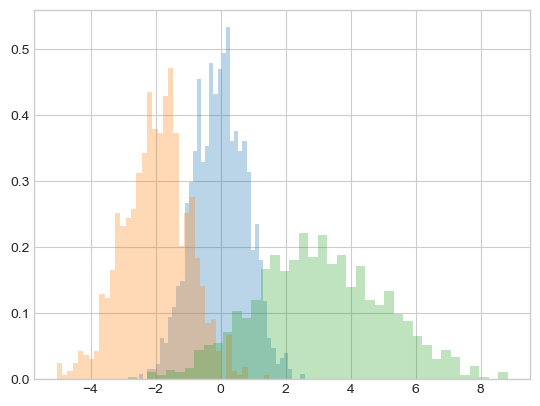

In [59]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Если вы хотите просто вычислить гистограмму (то есть подсчитать количество точек в заданном интервале), а не отображать ее, доступна функция `np.histogram()`:

In [60]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 42 285 479 165  29]


Точно так же, как мы создаем гистограммы в одном измерении, разделяя числовую линию на интервалы, мы также можем создавать гистограммы в двух измерениях, разделяя точки между двумерными интервалами.

Рассмотрим несколько способов сделать это. Мы начнем с определения некоторых данных — массива x и y, полученного из многомерного распределения Гаусса:

In [61]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

Простой способ построить двумерную гистограмму — использовать функцию `plt.hist2d` Matplotlib:

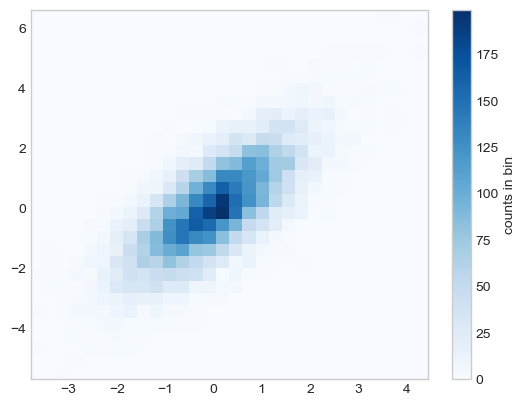

In [62]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Двумерная гистограмма создает мозаику квадратов по осям. Другая естественная форма для такой мозаики — правильный шестиугольник. Для этой цели Matplotlib предоставляет процедуру `plt.hexbin`, которая представляет собой двумерный набор данных, разбитый на сетку шестиугольников:

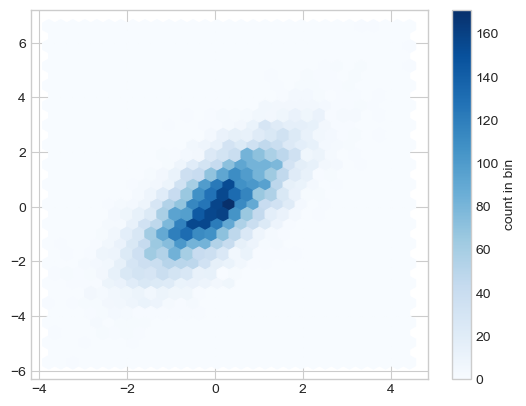

In [63]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

`plt.hexbin` имеет ряд интересных опций, включая возможность указывать веса для каждой точки и изменять выходные данные в каждой ячейке на любой агрегацию **NumPy** (среднее значение весов, стандартное отклонение весов и т. д.).

## Подграфики (Subplots)

Иногда полезно сравнить различные представления данных. С этой целью в Matplotlib есть концепция подграфиков: групп меньших осей, которые могут существовать вместе в пределах одной фигуры. Эти подграфики могут быть вставками, сетками графиков или другими более сложными макетами.

Самый простой метод создания осей — использование функции `plt.axes`. Как мы видели ранее, по умолчанию создается стандартный объект осей, который заполняет всю фигуру. `plt.axes` также принимает необязательный аргумент, который представляет собой список из четырех чисел в системе координат фигуры. Эти числа представляют [left, bottom, width, height] в системе координат рисунка, которая находится в диапазоне от 0 в левом нижнем углу рисунка до 1 в правом верхнем углу рисунка.

Например, мы могли бы создать вставленные оси в правом верхнем углу других осей, установив для позиции x и y значение 0,65 (то есть начиная с 65 % ширины и 65 % высоты фигуры), а x и y расширяются до 0,2 (то есть размер осей составляет 20% ширины и 20% высоты фигуры):

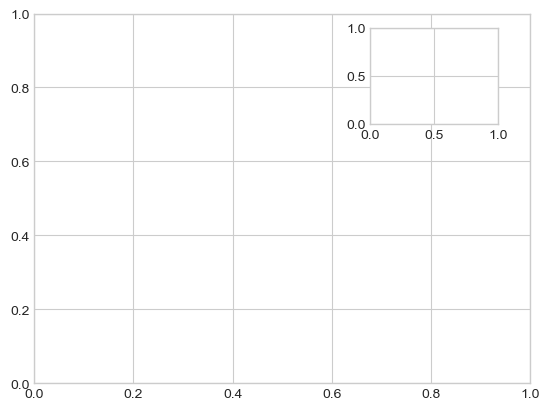

In [64]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Эквивалентом этой команды в объектно-ориентированном интерфейсе является `fig.add_axes()`.

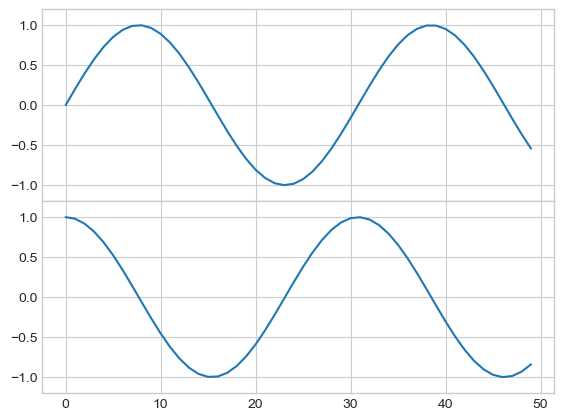

In [65]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Теперь у нас есть две оси (верхняя без меток), которые просто соприкасаются: нижняя часть верхней панели (в позиции 0,5) совпадает с верхней частью нижней панели (в позиции 0,1 + 0,4).

Выровненные столбцы или строки подграфиков являются достаточно распространенной потребностью, поэтому в Matplotlib есть несколько удобных процедур, которые упрощают их создание. Самый низкий уровень из них — `plt.subplot()`, который создает один подграфик внутри сетки. Эта команда принимает три целочисленных аргумента — количество строк, количество столбцов и индекс графика, который будет создан в этой схеме, который идет от верхнего левого угла к нижнему правому:

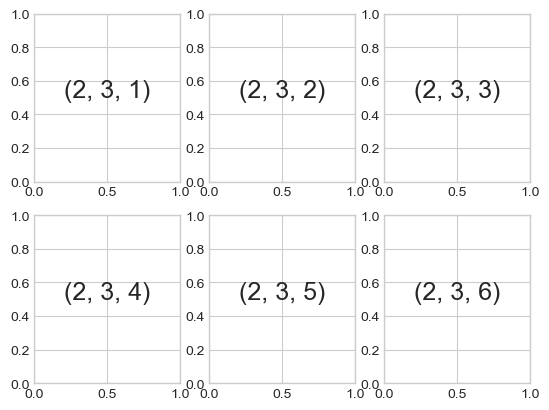

In [66]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

Команду `plt.subplots_adjust` можно использовать для регулировки расстояния между этими графиками. Следующий код использует эквивалентную объектно-ориентированную команду `fig.add_subplot()`:

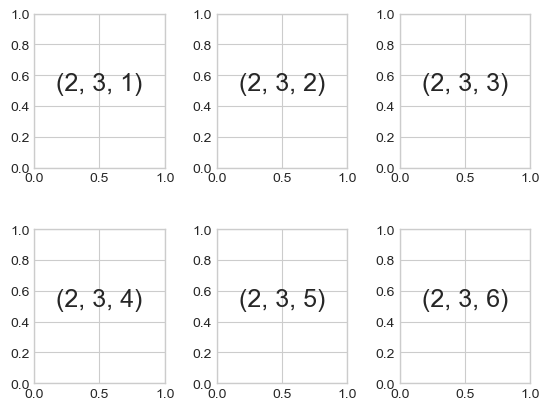

In [67]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Только что описанный подход может оказаться довольно утомительным при создании большой сетки подграфиков, особенно если вы хотите скрыть метки осей X и Y на внутренних графиках. Для этой цели `plt.subplots()` — более простой в использовании инструмент (обратите внимание на букву s в конце подграфиков). Вместо создания одного подграфика эта функция создает полную сетку подграфиков в одной строке, возвращая их в массиве **NumPy**. Аргументами являются количество строк и количество столбцов, а также необязательные ключевые слова **sharex** и **sharey**, которые позволяют указать отношения между различными осями.

Создадим сетку подграфиков, где все оси в одной строке имеют общий масштаб по оси Y, а все оси в одном столбце имеют общий масштаб по оси X:

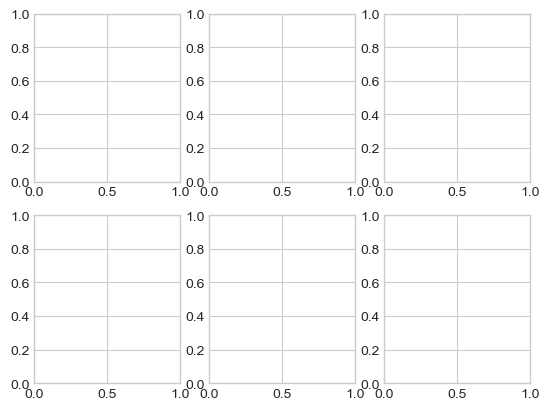

In [68]:
fig, ax = plt.subplots(2, 3)

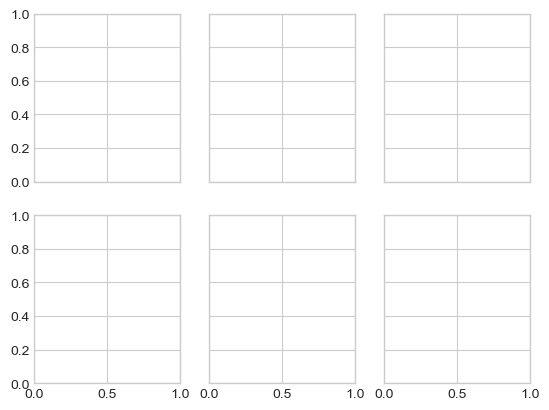

In [69]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Обратите внимание, что, указав **sharex** и **sharey**, мы автоматически удалили внутренние метки сетки, чтобы сделать график более чистым. Результирующая сетка экземпляров осей возвращается в массиве **NumPy**, что позволяет удобно указать нужные оси, используя стандартную нотацию индексации массива:

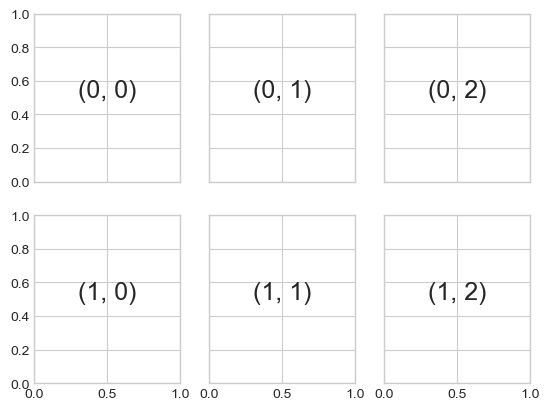

In [70]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

По сравнению с `plt.subplot()`, `plt.subplots()` более совместим с традиционной индексацией Python с отсчетом от 0.

## Визуализация с помощью Seaborn

**Seaborn** — это по сути более высокоуровневое API на базе библиотеки **matplotlib**, которое тесно интегрируется со структурами данных **pandas**. **Seaborn** содержит более адекватные дефолтные настройки оформления графиков.
Также в библиотеке есть достаточно сложные типы визуализации, которые в **matplotlib** потребовали бы большого количество кода.


In [35]:
import seaborn as sns
import pandas as pd

In [105]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

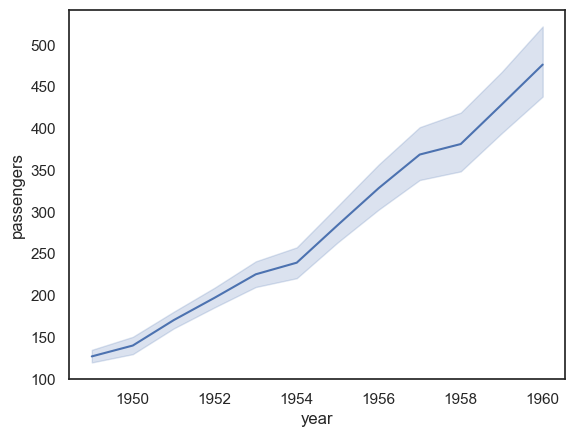

In [107]:
#Линейный график
sns.lineplot(data=flights_data, x="year", y="passengers")

In [124]:
# Диаграмма рассеяния — Scatter Plot
sns.scatterplot(data=flights_data, x="year", y="passengers")

NameError: name 'flights_data' is not defined

# Практическая работа

Далее вам предлагается самостоятельно познакомиться с библиотеками **Matplotlib** и **Seaborn**, а также с методом .plot() в библиотеке **Pandas**.

Дальнейшая работа будет строиться на основе набора данных по спросу на гостиничный сервис: https://doi.org/10.1016/j.dib.2018.11.126, [описание переменных](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub#t0005). Также, опубликован [здесь](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

## Получение внешних данных

Скачиваем архив с данными в текущую директорию

In [116]:
import zipfile

with zipfile.ZipFile('1-s2.0-S2352340918315191-mmc2.zip') as zip_file:
    f_h1 = zip_file.open('H1.csv')
    df_h1 = pd.read_csv(f_h1)
    f_h2 = zip_file.open('H2.csv')
    df_h2 = pd.read_csv(f_h2)

# Both hotels are located in Portugal: 
# - H1 at the resort region of Algarve
# - H2 at the city of Lisbon
df_h1['Type'] = 'resort'  
df_h2['Type'] = 'city'

# merging two parts into one
df = pd.concat([df_h1, df_h2])
df = df.reset_index(drop=True)

In [112]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Type
0,0,342,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort
1,0,737,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort
2,0,7,2015,July,27,1,0,1,1,0.0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort


In [113]:
df.tail()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Type
119385,0,23,2017,August,35,30,2,5,2,0.0,...,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,city
119386,0,102,2017,August,35,31,2,5,3,0.0,...,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,city
119387,0,34,2017,August,35,31,2,5,2,0.0,...,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,city
119388,0,109,2017,August,35,31,2,5,2,0.0,...,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,city
119389,0,205,2017,August,35,29,2,7,2,0.0,...,9,NULL,0,Transient,151.20,0,2,Check-Out,2017-09-07,city


In [117]:
# преобразуем имена колонок из CamelCase в snake_case (стилистическое изменение)

def camel_to_snake(s):
    return ''.join(['_'+c.lower() if c.isupper() else c for c in s]).lstrip('_')

df.columns = [camel_to_snake(column_name) for column_name in df.columns]

In [77]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,type
0,0,342,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort
1,0,737,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort
2,0,7,2015,July,27,1,0,1,1,0.0,...,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,resort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,city
119386,0,102,2017,August,35,31,2,5,3,0.0,...,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,city
119387,0,34,2017,August,35,31,2,5,2,0.0,...,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,city
119388,0,109,2017,August,35,31,2,5,2,0.0,...,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,city


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [118]:
# преобразуем даты

df['arrival_date_str'] = df['arrival_date_year'].astype('str') + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype('str')
df['arrival_date'] = pd.to_datetime(df['arrival_date_str'])
df['arrival_date_str'] = df['arrival_date'].dt.strftime('%Y-%m-%d')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     119390 non-null  int64         
 1   lead_time                       119390 non-null  int64         
 2   arrival_date_year               119390 non-null  int64         
 3   arrival_date_month              119390 non-null  object        
 4   arrival_date_week_number        119390 non-null  int64         
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   stays_in_weekend_nights         119390 non-null  int64         
 7   stays_in_week_nights            119390 non-null  int64         
 8   adults                          119390 non-null  int64         
 9   children                        119386 non-null  float64       
 10  babies                          119390 non-null  int64  

In [119]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,a_d_r,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [120]:
# транспонируем для удобства

df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [72]:
# транспонируем для удобства

df.describe(include='object').T

,count,unique,top,freq
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
agent,119390,334,9,31961
company,119390,353,NULL,112593


## Задание 2
Ознакомиться с описанием переменных и данными. Обратить внимание какие есть типы отеля, в каком временном промежутке собраны данные и т.д.

In [41]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,type,arrival_date_str,arrival_date
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort,2015-07-01,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort,2015-07-01,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort,2015-07-01,2015-07-01
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort,2015-07-01,2015-07-01
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort,2015-07-01,2015-07-01


**ВАЖНОЕ ЗАМЕЧАНИЕ:** Допускается несовпадение стилей построенных вами визуализаций с примерами ниже

## Задание 3
Посчитать количество заселений по месяцам (arrival_date_str) и по типам отелей (type) и построить следующую визуализацию:
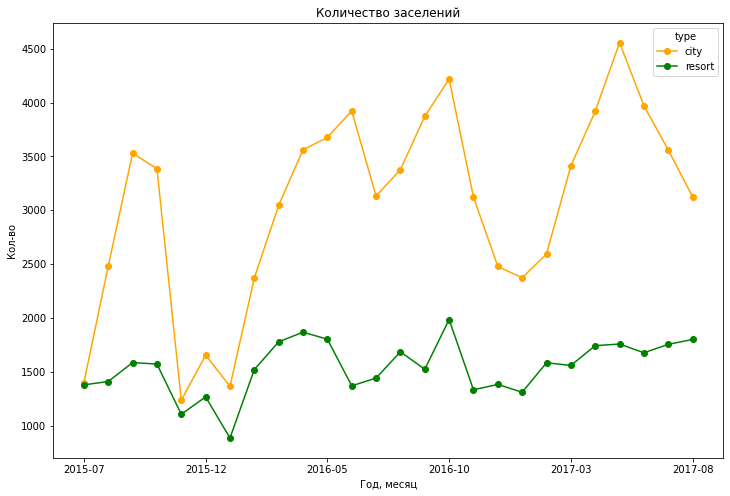

In [119]:
df1 = df
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,type,arrival_date_str,arrival_date
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort,2015-07-01,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort,2015-07-01,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort,2015-07-01,2015-07-01
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort,2015-07-01,2015-07-01
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,resort,2015-07-01,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,city,2017-08-30,2017-08-30
119386,0,102,2017,August,35,31,2,5,3,0.0,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,city,2017-08-31,2017-08-31
119387,0,34,2017,August,35,31,2,5,2,0.0,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,city,2017-08-31,2017-08-31
119388,0,109,2017,August,35,31,2,5,2,0.0,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,city,2017-08-31,2017-08-31


**Подсказка:** сначала необходимо подготовить данные с помощью **pandas** (например, при помощи pivot_table) и далее полученную таблицу отобразить в виде линейной диаграммы

In [120]:
df1['arrival_date_str'] = df1['arrival_date_str'].apply(lambda x: x[:-3])
df1

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,type,arrival_date_str,arrival_date
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort,2015-07,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort,2015-07,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort,2015-07,2015-07-01
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort,2015-07,2015-07-01
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,resort,2015-07,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,city,2017-08,2017-08-30
119386,0,102,2017,August,35,31,2,5,3,0.0,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,city,2017-08,2017-08-31
119387,0,34,2017,August,35,31,2,5,2,0.0,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,city,2017-08,2017-08-31
119388,0,109,2017,August,35,31,2,5,2,0.0,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,city,2017-08,2017-08-31


In [178]:
resort = df1[df1['type'] == 'resort'][['arrival_date_str', 'type']].groupby('arrival_date_str').count().reset_index()
city = df1[df1['type'] == 'city'][['arrival_date_str', 'type']].groupby('arrival_date_str').count().reset_index()

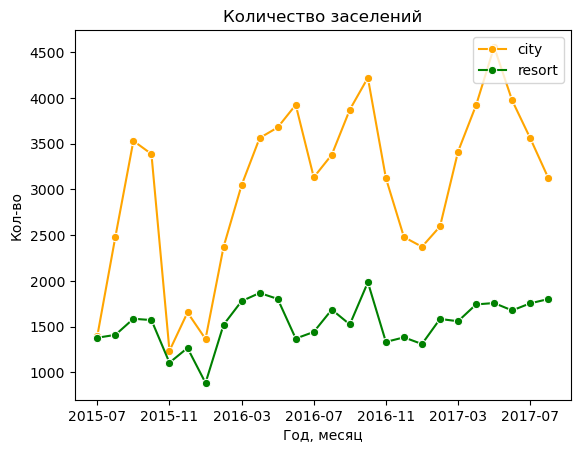

In [201]:
sns.lineplot(x="arrival_date_str", y="type",data=city, marker='o', color='orange', label='city')
sns.lineplot(x="arrival_date_str", y="type",data=resort, marker='o', color='green', label='resort')
x_ticks = city["arrival_date_str"][::4]

plt.xticks(x_ticks)
plt.xlabel("Год, месяц")
plt.ylabel("Кол-во")
plt.title("Количество заселений")
plt.legend(loc='upper right')
plt.show()

## Задание 4
Линейные диаграммы не очень корректно использовать для описания событий, которые, возможно, не относятся к одному процессу. Так, в примере, выше количества бронирований соединены между собой, но есть ли смысл в таком соединении? Если хорошего ответа нет, то лучше использовать столбатые диаграммы.

Перестроить визуализацию выше в столбчатую диаграмму
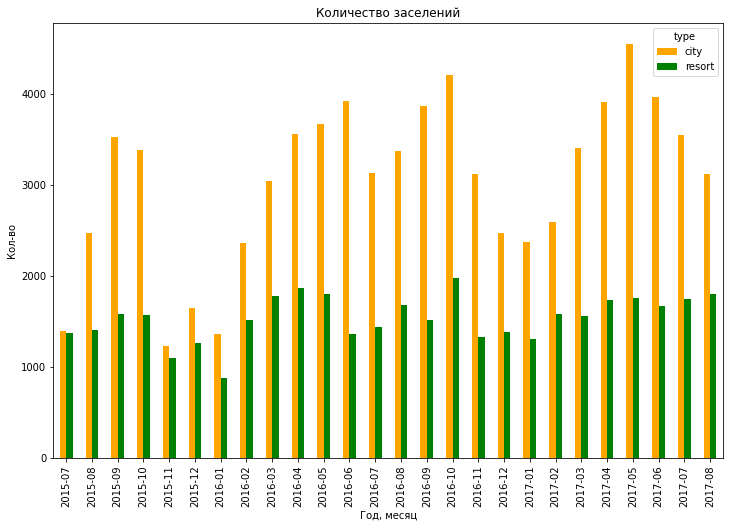

c:\Users\ivid0\.conda\envs\my_env_first\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


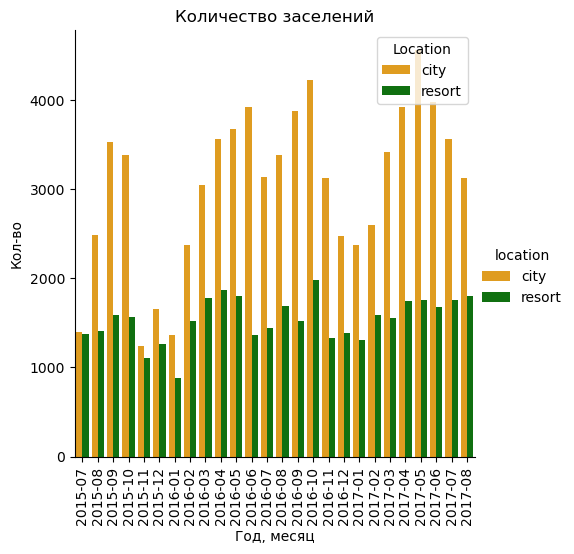

In [230]:
city['location'] = 'city'
resort['location'] = 'resort'
combined_data = pd.concat([city, resort])
g = sns.catplot(x="arrival_date_str", y="type", hue="location", data=combined_data, kind="bar",  
                palette={"city": "orange", "resort": "green"})
g.ax.legend(title="Location", loc="upper right")


plt.xticks(rotation=90)
plt.xlabel("Год, месяц")
plt.ylabel("Кол-во")
plt.title("Количество заселений")
plt.show()

## Задание 5
Построить визуализацию ниже
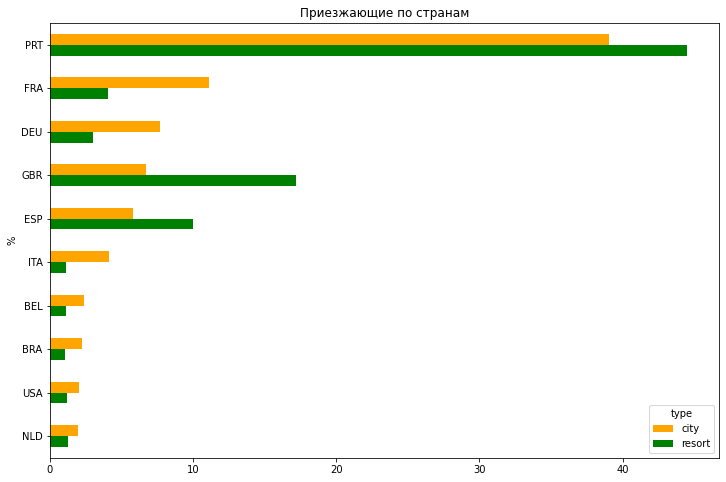

**Подсказка:** При помощи **pandas** необходимо расчитать процент приезжающих по странам (country) и типам отеля (type) в процентах (например, использовать groupby() и агрегации)

In [ ]:
df1 = df
df1

In [231]:
resort = df1[df1['type'] == 'resort'][['arrival_date_str', 'type']].groupby('arrival_date_str').count().reset_index()
city = df1[df1['type'] == 'city'][['arrival_date_str', 'type']].groupby('arrival_date_str').count().reset_index()

## Задание 6
Построить визуализации ниже
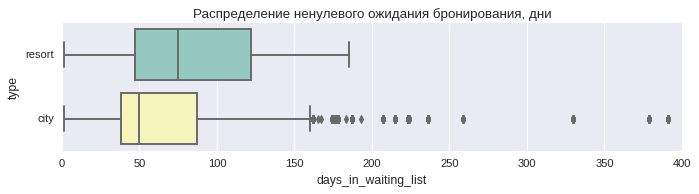

**Подсказка:** Необходимо расчитать ожидание подтверждения бронирования (в днях) в разрезе по типам отелей (type). Тип визуализации boxplot 

In [ ]:
# ваш код

## Задание 7
Построить визуализацию ниже
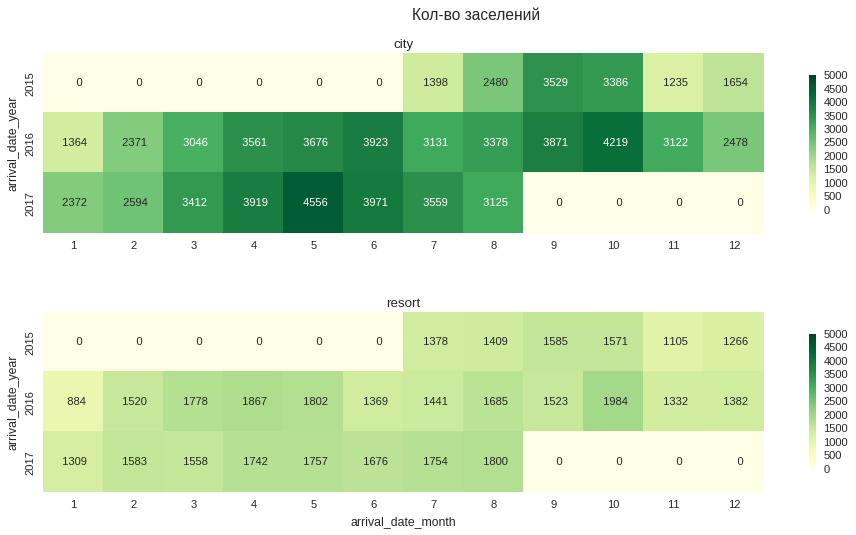

**Подсказка:** Необходимо расчитать количество заселений по годам (arrival_date_year) и месяцам (arrival_date_month) в разрезе типа отелей. Тип визуализации heatmap

In [ ]:
# ваш код

## Задание 8
Построить визуализацию ниже
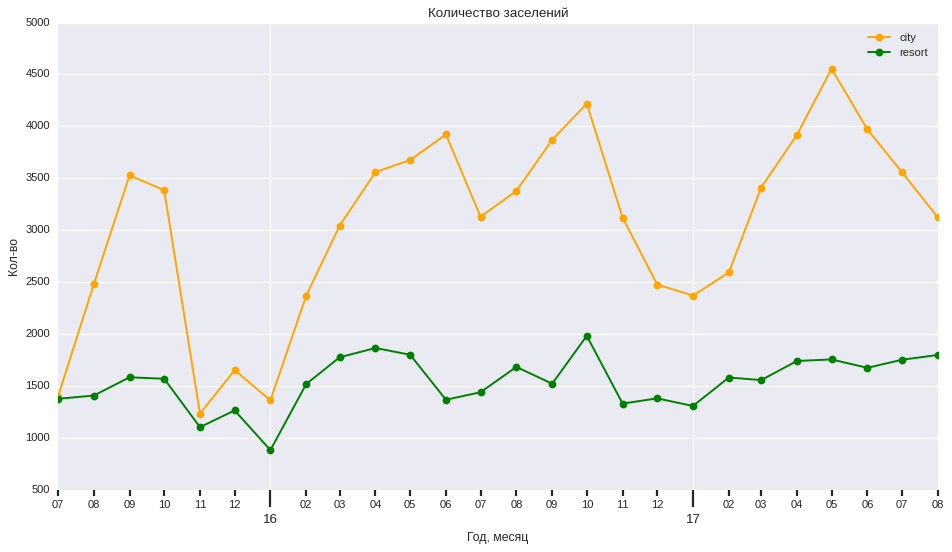

**Подсказка:** изучить что такое Деления координатной оси Ticks, методы Locator (`matplotlib.dates.YearLocator` и `matplotlib.dates.MonthLocator`) и Formatter (`matplotlib.dates.DateFormatter('%y')` и `matplotlib.dates.DateFormatter('%m')`)

In [ ]:
# ваш код

## Ресурсы в помощь
https://indico-hlit.jinr.ru/event/151/attachments/340/492/Project_school_Matplotlib_original.pdf